Importing the Dependencies

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn.datasets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import mode
import joblib


Data Collection & Processing

In [25]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [26]:
# loading the data to data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [27]:
# print the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [29]:
# print the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Separating the features and target

In [30]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [31]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [32]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (398, 30) (171, 30)


PCA (Principal Component Analysis) & t-SNE (t-distributed Stochastic Neighbor Embedding)



1. Focus: This combination ("mean radius," "mean texture," "mean perimeter") emphasizes the size and texture characteristics of cells.

Use Case: Useful to explore how variations in size and texture might be associated with different outcomes.

2. Focus: This combination ("radius error," "texture error," "perimeter error") highlights the errors associated with measurements of radius, texture, and perimeter.

Use Case: Suitable for assessing measurement accuracy and identifying potential sources of errors.

3. Focus: This combination ("worst radius," "worst texture," "worst perimeter") examines the worst-case scenarios for radius, texture, and perimeter.


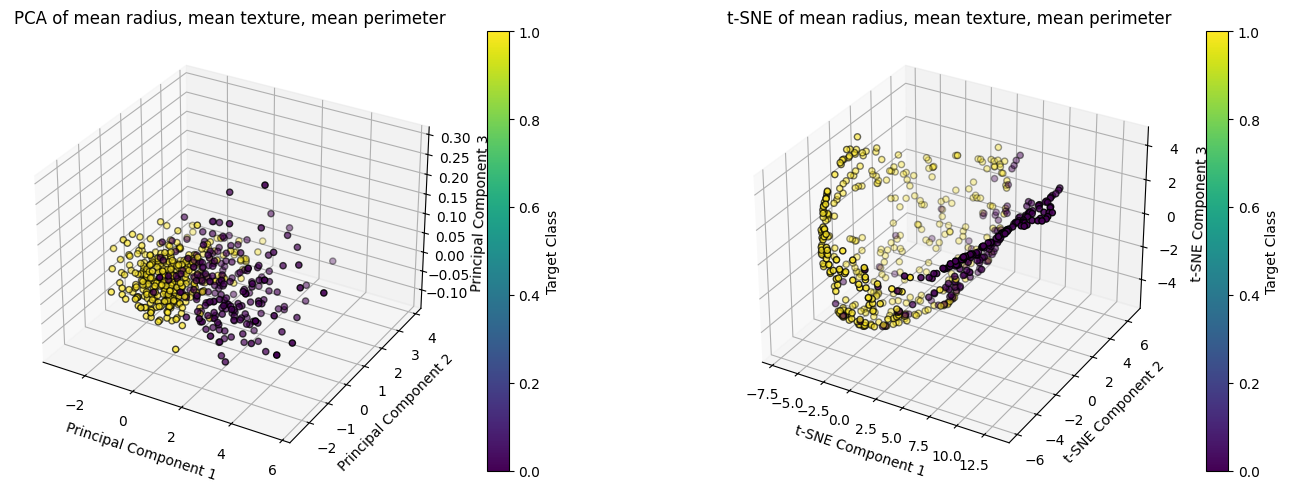

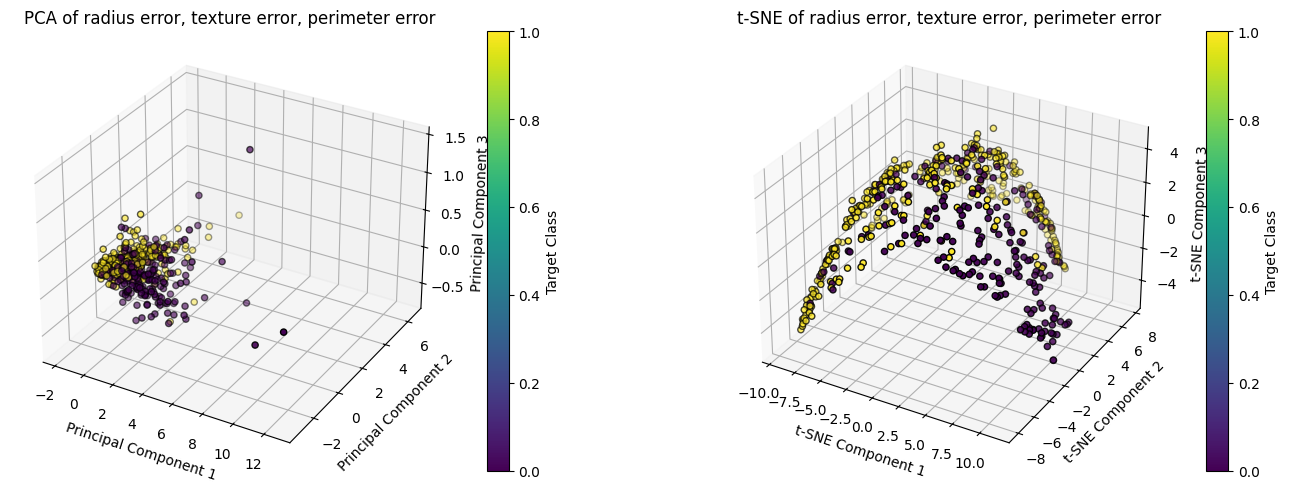

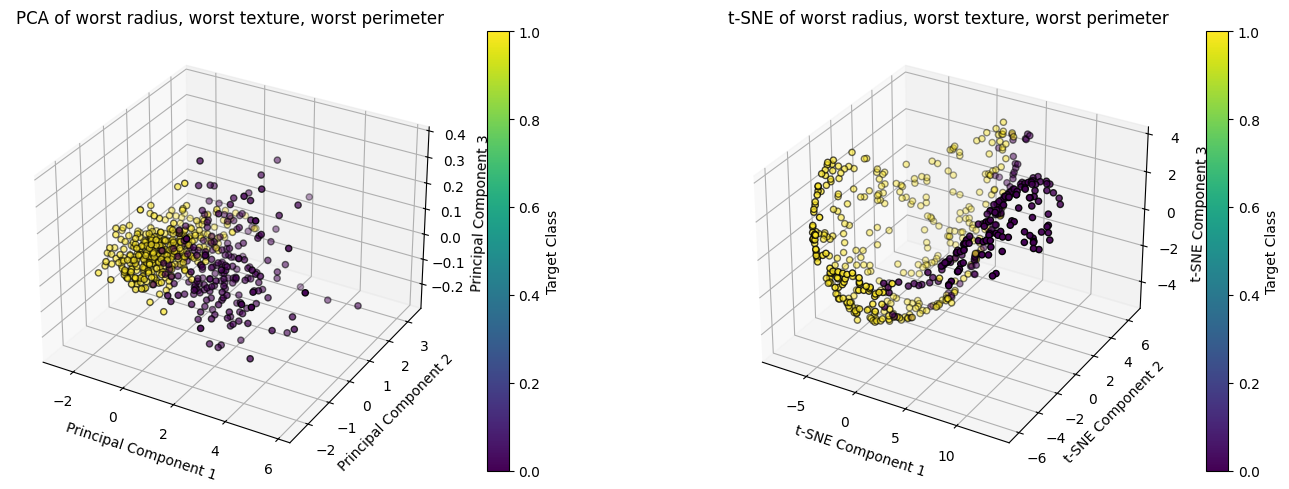

In [35]:
# Load and Preprocess Data
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the combinations
combinations = [
    ["mean radius", "mean texture", "mean perimeter"],
    ["radius error", "texture error", "perimeter error"],
    ["worst radius", "worst texture", "worst perimeter"]
]

# Loop through each combination and apply PCA and t-SNE
for i, selected_features in enumerate(combinations):
    # Selecting the specific features for the current combination
    X_selected = X_scaled[:, [data.feature_names.tolist().index(f) for f in selected_features]]

    # Apply PCA to the selected features
    n_components_pca = 3
    pca = PCA(n_components=n_components_pca)
    X_pca = pca.fit_transform(X_selected)

    # Apply t-SNE to the selected features
    tsne = TSNE(n_components=3, random_state=42)
    X_tsne = tsne.fit_transform(X_selected)

    # Visualize in 3D for PCA
    fig = plt.figure(figsize=(15, 5))

    # Subplot for PCA
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolor='k')
    ax1.set_xlabel('Principal Component 1')
    ax1.set_ylabel('Principal Component 2')
    ax1.set_zlabel('Principal Component 3')
    ax1.set_title(f'PCA of {", ".join(selected_features)}')
    fig.colorbar(scatter1, label='Target Class')

    # Subplot for t-SNE
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='viridis', edgecolor='k')
    ax2.set_xlabel('t-SNE Component 1')
    ax2.set_ylabel('t-SNE Component 2')
    ax2.set_zlabel('t-SNE Component 3')
    ax2.set_title(f't-SNE of {", ".join(selected_features)}')
    fig.colorbar(scatter2, label='Target Class')

    plt.tight_layout()
    plt.show()


Feature Importance Visualization (Bar Plots, Heatmap)

C:\Users\Ananta Chakraborty\AppData\Local\Temp\ipykernel_8976\85584753.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


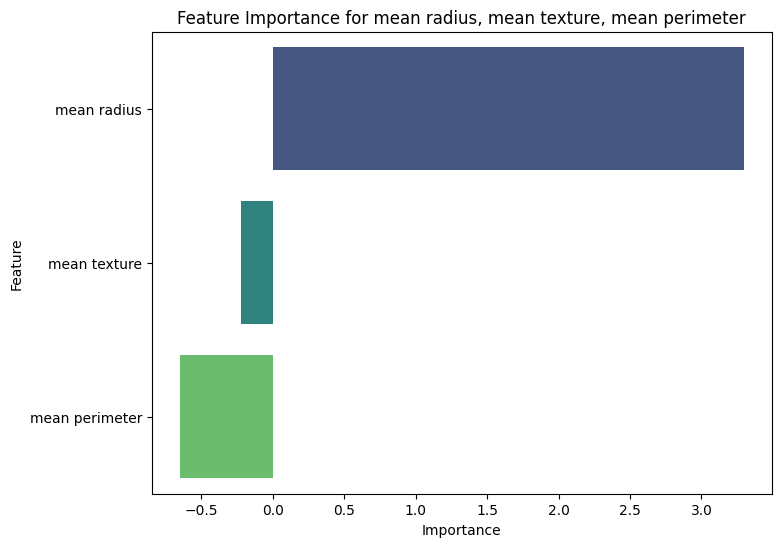

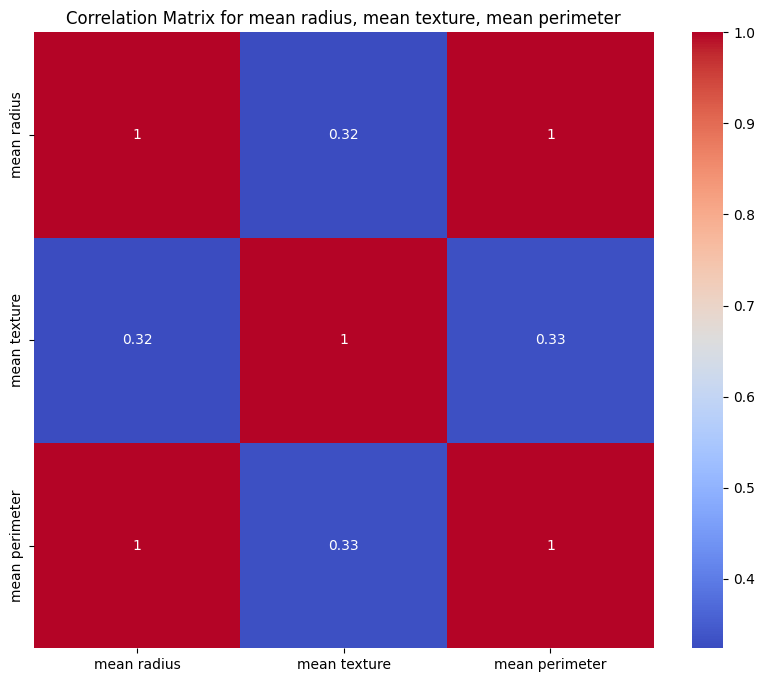

C:\Users\Ananta Chakraborty\AppData\Local\Temp\ipykernel_8976\85584753.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


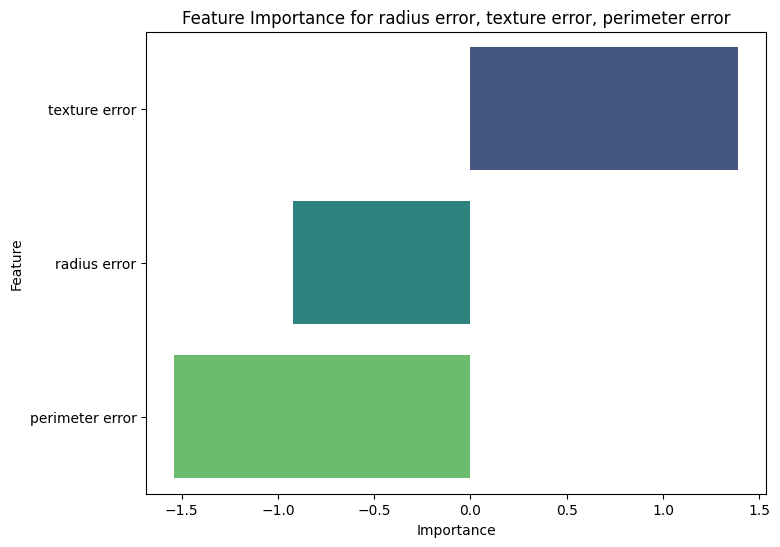

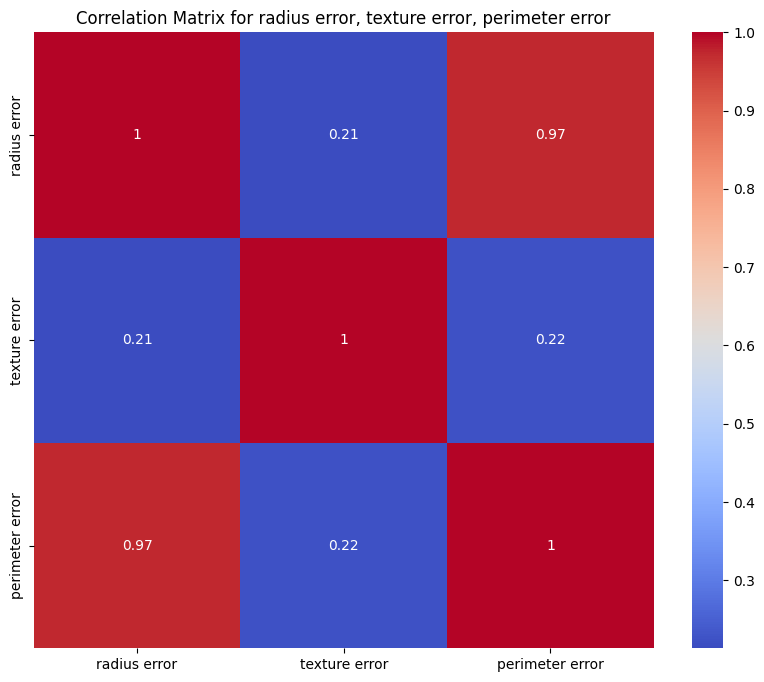

C:\Users\Ananta Chakraborty\AppData\Local\Temp\ipykernel_8976\85584753.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


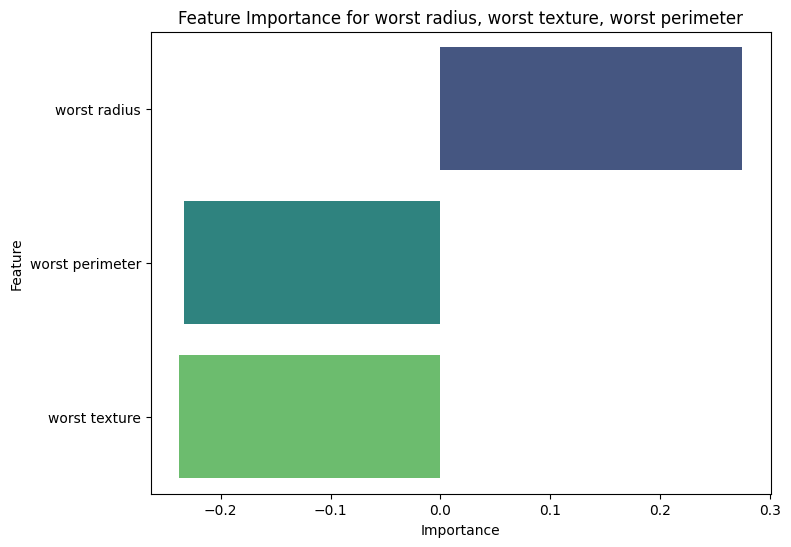

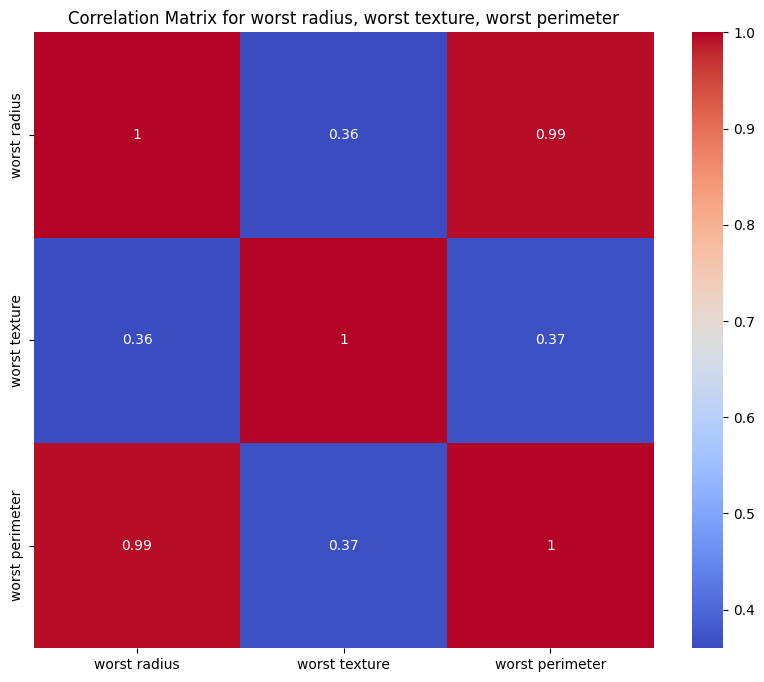

In [36]:
# Load Data
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Define the combinations of features
combinations = [
    ["mean radius", "mean texture", "mean perimeter"],
    ["radius error", "texture error", "perimeter error"],
    ["worst radius", "worst texture", "worst perimeter"]
]

# Loop through each combination and fit a Logistic Regression model
for selected_features in combinations:
    # Selecting the specific features for the current combination
    selected_indices = [feature_names.tolist().index(f) for f in selected_features]
    X_selected = X[:, selected_indices]

    # Fit a Logistic Regression model
    model = LogisticRegression()
    model.fit(X_selected, y)

    # Get feature importances
    feature_importances = model.coef_[0]

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({"Feature": selected_features, "Importance": feature_importances})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    # Visualize feature importance using a bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
    plt.title(f"Feature Importance for {', '.join(selected_features)}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

    # Create a correlation matrix for selected features
    selected_feature_matrix = pd.DataFrame(X_selected, columns=selected_features)
    correlation_matrix = selected_feature_matrix.corr()

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Matrix for {', '.join(selected_features)}")
    plt.show()


Model Training (Using - Logistic Regression)

In [37]:
# Create and train the Logistic Regression model
lr_model = LogisticRegression()
# training the Logistic Regression model using Training data
lr_model.fit(X_train, Y_train)

c:\Users\Ananta Chakraborty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Training (Using - Random Forest)

In [38]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# training the Random Forest model using Training data
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

Finding important features to perform virtualization

In [39]:
# Get feature importance scores (coefficients) for Logistic Regression
feature_importance_scores = lr_model.coef_[0]

# Match feature names with their importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importance_scores))

# Print or visualize the feature importance scores
for feature, importance in feature_importance_dict.items():
    print(f"Feature: {feature}, Importance: {importance}")


Feature: mean radius, Importance: 1.0246741267204975
Feature: mean texture, Importance: 0.48928157450303206
Feature: mean perimeter, Importance: 0.2417649240810899
Feature: mean area, Importance: -0.017730518464687692
Feature: mean smoothness, Importance: -0.03740328540068974
Feature: mean compactness, Importance: -0.1830236420120175
Feature: mean concavity, Importance: -0.2577504061055209
Feature: mean concave points, Importance: -0.11094508854065191
Feature: mean symmetry, Importance: -0.05707294579185332
Feature: mean fractal dimension, Importance: -0.011440385379681178
Feature: radius error, Importance: 0.03354395339589298
Feature: texture error, Importance: 0.45496185811664863
Feature: perimeter error, Importance: 0.06798607593126188
Feature: area error, Importance: -0.10664572091926233
Feature: smoothness error, Importance: -0.003525289656338516
Feature: compactness error, Importance: -0.03856717793394461
Feature: concavity error, Importance: -0.05294585546661359
Feature: concave

In [40]:
# Get feature importance scores for Random Forest
rf_feature_importance_scores = rf_model.feature_importances_

# Match feature names with their importance scores for Random Forest
rf_feature_importance_dict = dict(zip(X_train.columns, rf_feature_importance_scores))

# Print or visualize the feature importance scores
for feature, importance in rf_feature_importance_dict.items():
    print(f"Feature: {feature}, Importance: {importance}")


Feature: mean radius, Importance: 0.032311888273301004
Feature: mean texture, Importance: 0.011063901250175845
Feature: mean perimeter, Importance: 0.060092333477412795
Feature: mean area, Importance: 0.05381045367561502
Feature: mean smoothness, Importance: 0.006223358550035776
Feature: mean compactness, Importance: 0.009215659698391042
Feature: mean concavity, Importance: 0.08055701642634591
Feature: mean concave points, Importance: 0.1419344436315119
Feature: mean symmetry, Importance: 0.003278068988046974
Feature: mean fractal dimension, Importance: 0.003140276443878005
Feature: radius error, Importance: 0.016434957577357797
Feature: texture error, Importance: 0.003171913625550393
Feature: perimeter error, Importance: 0.011769755537440448
Feature: area error, Importance: 0.029538418256883636
Feature: smoothness error, Importance: 0.005880791914760226
Feature: compactness error, Importance: 0.004596378662668866
Feature: concavity error, Importance: 0.005815899489496524
Feature: conc

Model Evaluation for Logistic Regression and Random Forest  (Accuracy Score)

In [41]:
# Make predictions using Logistic Regression
lr_train_predictions = lr_model.predict(X_train)
lr_test_predictions = lr_model.predict(X_test)

In [42]:
print(classification_report(Y_test,lr_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [43]:

# Make predictions using Random Forest
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

In [44]:
print(classification_report(Y_test,rf_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [45]:
# save model
joblib.dump(rf_model, '../model/random_forest_model.pkl')


['../model/random_forest_model.pkl']

In [46]:
joblib.dump(lr_model, '../model/lr_model.pkl')


['../model/lr_model.pkl']